# pavankumar kamble

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r'D:\data science\data science assg\assg.6 logistic reg\bank-full.csv',sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<AxesSubplot:xlabel='poutcome', ylabel='count'>

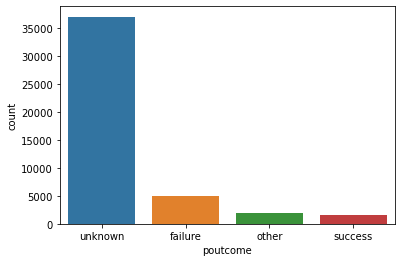

In [5]:
sns.countplot(x='poutcome',data=df)

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
df.drop(["poutcome"],inplace=True,axis=1)
df.drop(["job"],inplace = True,axis=1)
df.drop(["contact"],inplace=True , axis=1)
df.drop(["month"],inplace = True , axis=1)

In [8]:
df = pd.get_dummies(df,columns=['housing'],drop_first=True)
df= pd.get_dummies(df,columns=['loan'],drop_first=True)
df= pd.get_dummies(df,columns=['y'],drop_first=True)
df= pd.get_dummies(df,columns=['marital'],drop_first=True)
df= pd.get_dummies(df,columns=['education'],drop_first=True)
df= pd.get_dummies(df,columns=['default'],drop_first=True)

In [9]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,housing_yes,loan_yes,y_yes,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes
0,58,2143,5,261,1,-1,0,1,0,0,1,0,0,1,0,0
1,44,29,5,151,1,-1,0,1,0,0,0,1,1,0,0,0
2,33,2,5,76,1,-1,0,1,1,0,1,0,1,0,0,0
3,47,1506,5,92,1,-1,0,1,0,0,1,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,0,1,0,0,1,0


In [10]:
df=df.dropna()
df.shape

(45211, 16)

In [11]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,housing_yes,loan_yes,y_yes,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes
0,58,2143,5,261,1,-1,0,1,0,0,1,0,0,1,0,0
1,44,29,5,151,1,-1,0,1,0,0,0,1,1,0,0,0
2,33,2,5,76,1,-1,0,1,1,0,1,0,1,0,0,0
3,47,1506,5,92,1,-1,0,1,0,0,1,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,0,1,0,0,1,0


In [12]:
X = df.iloc[:,1:]
y = df['default_yes']

In [13]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
classifier = LogisticRegression()
classifier.fit(X,y)

C:\Users\91832\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
y_pred_df= pd.DataFrame({'actual': y,
                         'predicted_prob': classifier.predict(X)})

In [17]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,0,0
45207,0,0
45208,0,0
45209,0,0


In [18]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y_pred)
print(mat)

[[14690     1]
 [    1   228]]


In [19]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))
pd.crosstab(y_test,y_pred)

0.9998659517426274


col_0,0,1
default_yes,,
0,14690,1
1,1,228


In [20]:
((14690+228)/(14690+1+1+228)*100)

99.98659517426273

In [21]:
from sklearn.metrics import classification_report

In [22]:
classification_report(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14691
           1       1.00      1.00      1.00       229

    accuracy                           1.00     14920
   macro avg       1.00      1.00      1.00     14920
weighted avg       1.00      1.00      1.00     14920



In [27]:
pre=classifier.predict_proba(X_test)
pre

array([[9.99987543e-01, 1.24565975e-05],
       [9.99924794e-01, 7.52059435e-05],
       [9.99929836e-01, 7.01644270e-05],
       ...,
       [9.99929801e-01, 7.01987483e-05],
       [9.98809546e-01, 1.19045417e-03],
       [9.99987706e-01, 1.22942418e-05]])

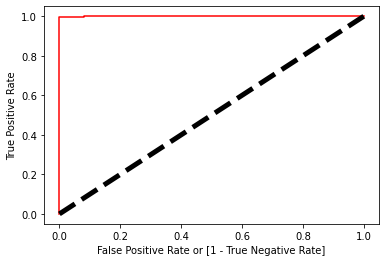

In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba (X_test)[:,1])

auc = roc_auc_score(y_test, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--',lw=5)
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [25]:
roc_auc_score(y_test, classifier.predict_proba (X_test)[:,1])

0.9995799941680719